Análisis Exploratorio de Datos o EDA 

*****************
importo las librerías y cargo el dataset
*****************

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
sns.set()
from scipy import stats
import matplotlib.pyplot as plt

#import ColumnTransforme_regression


In [2]:
properties_colombia_csv=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\properties_colombia_train.csv',encoding='utf8')

In [21]:
properties_colombia_csv.shape

(197549, 27)

In [3]:
properties_colombia_csv.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


*****************
empiezo con la columna price: completo faltantes y paso a 0,1 (barato,caro)
continuo con las columnas numericas
borrando las columnas que que considero innecesarias
sigo con las columnas que contienen palabras
*****************

In [3]:
var_col=pd.DataFrame(properties_colombia_csv.price[properties_colombia_csv.price.notnull()])

paso a float sacando el formato cientifico en la columna price(e+09)

In [9]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [17]:
var_col.price

0        9000000000
1         625000000
2         420000000
3        1310000000
4         210000000
            ...    
197544    129000000
197545    135000000
197546    520000000
197547    290000000
197548     30000000
Name: price, Length: 197486, dtype: float64

necesito saber cuales registros tienen outlier en la columna price asi que ajecuto la siguiente funcion

In [4]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high

In [5]:
fence_low, fence_high=remove_outlier(var_col, "price")

In [207]:
fence_high

1200000000.0

In [208]:
fence_low

-400000000.0

In [20]:
var_col.median()

price   330000000
dtype: float64

precios atipicos

In [6]:
var_col.loc[var_col["price"] > fence_high]

,price
0,9.000000e+09
3,1.310000e+09
6,2.700000e+09
12,1.430852e+09
14,3.000000e+09
...,...
197500,1.350000e+09
197501,4.016143e+09
197505,1.578000e+09
197521,1.800000e+09


quito los outlier para calcular el valor promedio. Este dato lo voy a usar para sustituir los nan (faltantes)

In [7]:
newdf_loc=var_col.loc[(var_col["price"] > 0) & (var_col["price"] < fence_high)]

este es el promedio sin los outlier la columna price

In [8]:
promedio_price=newdf_loc.mean()

In [9]:
promedio_price

price    3.659724e+08
dtype: float64

In [10]:
promedio_price=int(promedio_price[0])

este es el promedio con los outlier la columna price

In [15]:
var_col.mean()

price   643605091
dtype: float64

In [26]:
var_col.mode()

,price
0,250000000


reemplazo la palabra nan en todas las columnas por np.nan(NaN)
compruebo los datos nan, NaN 

In [11]:
properties_colombia_csv = properties_colombia_csv.replace("nan",np.nan)

In [12]:
properties_colombia_csv = properties_colombia_csv.replace("NaN",np.nan)

reemplazo np.nan en price por el promedio (sin los outlier)

In [13]:
properties_colombia_csv.price = properties_colombia_csv["price"].replace(np.nan,promedio_price)

In [14]:
#dejo este codigo promedio_price
properties_colombia_csv["price_Binary"]= pd.cut(x = properties_colombia_csv['price'],bins=[properties_colombia_csv['price'].min()-1,promedio_price,properties_colombia_csv['price'].max()+1], labels=['bajo', 'alto'])


In [15]:
properties_colombia_csv.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,price_Binary
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),alto
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),alto


alto 1 bajo 0

In [16]:
properties_colombia_csv.price_Binary = properties_colombia_csv["price_Binary"].replace("alto",1)

In [17]:
properties_colombia_csv.price_Binary = properties_colombia_csv["price_Binary"].replace("bajo",0)

In [18]:
properties_colombia_csv.to_csv("columbia_houses_train.csv", index=False)

In [35]:
properties_colombia_csv=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\columbia_houses.csv',encoding='utf8')

In [36]:
properties_colombia_csv.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                   0
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
price_Binary            0
dtype: int64

In [19]:
len_csv=properties_colombia_csv.shape

In [20]:
is_null=((properties_colombia_csv.isnull().sum())*100)/len_csv[0]

porcentaje de nulos por columna si es mayor a 30% la columna se borra
l6                 % 96.523900
surface_total      % 96.469737
surface_covered    % 95.038193
l5                 % 86.125468
rooms              % 86.060674
price_period       % 81.791353
bedrooms           % 79.486102
l4                 % 77.035065

In [39]:
is_null.sort_values(ascending=False)

l6                97
surface_total     96
surface_covered   95
l5                86
rooms             86
price_period      82
bedrooms          79
l4                77
lat               25
lon               25
bathrooms         21
l3                 6
description        0
currency           0
title              0
price              0
property_type      0
operation_type     0
geometry           0
Unnamed: 0         0
id                 0
l2                 0
l1                 0
created_on         0
end_date           0
start_date         0
ad_type            0
price_Binary       0
dtype: float64

In [40]:
properties_colombia_csv.nunique()

Unnamed: 0         197549
id                 197549
ad_type                 1
start_date            145
end_date              446
created_on            145
lat                 51077
lon                 50108
l1                      1
l2                     31
l3                    293
l4                     58
l5                     20
l6                    146
rooms                  29
bedrooms               37
bathrooms              20
surface_total        1035
surface_covered       783
price                6097
currency                2
price_period            1
title               95025
description        111371
property_type           8
operation_type          1
geometry            62807
price_Binary            2
dtype: int64

cantidad de datos unicos en columna l3

In [41]:
properties_colombia_csv.l3.value_counts().sort_values(ascending=False)

Medellín         43404
Bogotá D.C       28731
Cali             20846
Barranquilla     15133
Manizales        14128
                 ...  
Guateque             1
Arcabuco             1
Yacopí               1
Vergara              1
Quebradanegra        1
Name: l3, Length: 293, dtype: int64

borro las columnas:
*ad_type porque no aporta valor en la prediccion tiene un solo dato: "Propiedad"
*id porque no aporta valor significativo a la prediccion al ser numeros consecutivos
*Unnamed: 0 porque no aporta valor significativo a la prediccion
*si es mayor a 30% lo porcentajes de nan en la columna se borra la columna
*al transformar la columna price en 0 y 1 ( alto,bajo ) borro la columna price
*al tener lat y lon en col separadas borro la columna geometry porque es redundante
*l1 porque no aporta valor en la prediccion tiene un solo dato:colombia
*operation_type porque no aporta valor en la prediccion tiene un solo dato:venta

In [21]:
properties_colombia_csv=properties_colombia_csv.drop(columns=["ad_type","Unnamed: 0","id","l6","surface_covered","surface_total","l5","rooms","price_period","bedrooms","l4","price","geometry","l1","operation_type","title","description"])

In [267]:
#properties_colombia_csv=properties_colombia_csv.drop(properties_colombia_csv.columns[13], axis='columns')

In [22]:
properties_colombia_csv.to_csv("columbia_houses_train.csv", index=False)

latitud
-4 a 12
longuitud
-65 a-79

coordenadas invalidas

In [23]:
properties_colombia_csv[properties_colombia_csv["lat"]<-4]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type,price_Binary
138682,2020-09-29,2021-07-26,2020-09-29,-32.787342,-71.20732,Cundinamarca,La Calera,6.0,COP,Casa,1


borro registro porque la coordenada no es de colombia

In [24]:
properties_colombia_csv=properties_colombia_csv.drop([138682])

In [41]:
#properties_colombia_csv=properties_colombia_csv.drop(properties_colombia_csv.columns[9], axis='columns')

busco los datos de latitud y longitud faltantes 

In [25]:
lat_lon_df=properties_colombia_csv[properties_colombia_csv["lat"].isnull()] 

In [26]:
df_geo=pd.DataFrame(lat_lon_df.l2.value_counts())

In [27]:
df_geo

,l2
Antioquia,33742
Atlántico,3249
Cundinamarca,2911
Valle del Cauca,2092
Santander,1744
Risaralda,1399
Caldas,1269
Meta,755
Cauca,591
Bolívar,413


In [28]:
df_geo['texto'] = df_geo.index

In [29]:
df_geo

,l2,texto
Antioquia,33742,Antioquia
Atlántico,3249,Atlántico
Cundinamarca,2911,Cundinamarca
Valle del Cauca,2092,Valle del Cauca
Santander,1744,Santander
Risaralda,1399,Risaralda
Caldas,1269,Caldas
Meta,755,Meta
Cauca,591,Cauca
Bolívar,413,Bolívar


In [30]:
list_geo=list(df_geo["texto"])

In [31]:
list_geo[0]

'Antioquia'

veo los datos unicos de las columnas que quedan

In [32]:
properties_colombia=['l2', 'l3',"currency","property_type",'bathrooms']

listproperties_colombia=list(properties_colombia)

#ver valores unicos en las columnas
for indice,columns_properties in enumerate(listproperties_colombia) :
    print(columns_properties)
    sort_properties =properties_colombia_csv[columns_properties].sort_values()
    listaproperties=sort_properties.unique()
    print(listaproperties)

l2
['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Cundinamarca' 'Córdoba'
 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena' 'Meta' 'Nariño'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés Providencia y Santa Catalina' 'Santander' 'Sucre' 'Tolima'
 'Valle del Cauca' 'Vichada']
l3
['Abejorral' 'Acacías' 'Acandí' 'Agua de Dios' 'Aguazul' 'Aipe' 'Albania'
 'Albán' 'Alvarado' 'Anapoima' 'Andalucía' 'Anolaima' 'Anserma' 'Apulo'
 'Arauca' 'Arbeláez' 'Arcabuco' 'Arjona' 'Armenia' 'Balboa' 'Baranoa'
 'Barbosa' 'Barichara' 'Barrancabermeja' 'Barranquilla' 'Bello'
 'Bochalema' 'Bogotá D.C' 'Bojacá' 'Bucaramanga' 'Buenaventura' 'Buesaco'
 'Cabrera' 'Cachipay' 'Caicedonia' 'Cajicá' 'Calarca' 'Caldas' 'Cali'
 'Calima' 'Candelaria' 'Caparrapí' 'Carmen de Apicalá' 'Carmen de Carupa'
 'Cartagena' 'Cartago' 'Casabianca' 'Chaparral' 'Chigorodó' 'Chinauta'
 'Chinácota' 'Chipaque' 'Chiquinquirá' 'Choachí' 'Cho

In [39]:
properties_colombia_csv.isnull().sum()

start_date           0
end_date             0
created_on           0
lat              49498
lon              49498
l2                   0
l3               11032
bathrooms        41082
currency            67
property_type        0
price_Binary         0
dtype: int64

In [40]:
properties_colombia_csv[properties_colombia_csv["lat"]>12]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type,price_Binary
7159,2020-09-02,2020-09-02,2020-09-02,13,-81,San Andrés Providencia y Santa Catalina,Providencia,NaN,COP,Lote,1
18218,2020-09-02,2020-09-21,2020-09-02,13,-81,San Andrés Providencia y Santa Catalina,Providencia,NaN,COP,Lote,1
20753,2020-07-29,2020-10-06,2020-07-29,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote,1
35581,2020-08-08,2021-04-07,2020-08-08,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote,1
70284,2020-10-28,2021-01-02,2020-10-28,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote,1
71985,2020-10-01,2021-03-04,2020-10-01,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,3,COP,Casa,1
107249,2020-10-28,2020-10-28,2020-10-28,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote,1
109821,2020-10-28,2021-01-02,2020-10-28,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,NaN,COP,Lote,1
114121,2020-09-16,9999-12-31,2020-09-16,13,-82,San Andrés Providencia y Santa Catalina,NaN,NaN,COP,Finca,1
130003,2020-07-28,2021-07-19,2020-07-28,13,-82,San Andrés Providencia y Santa Catalina,San Andrés,3,COP,Casa,1


In [41]:
properties_colombia_csv[properties_colombia_csv["lat"].isnull()]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type,price_Binary
3,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Santander,Bucaramanga,1,COP,Otro,1
4,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Antioquia,Medellín,2,COP,Apartamento,0
9,2020-08-18,2020-08-25,2020-08-18,NaN,NaN,Atlántico,Barranquilla,3,COP,Apartamento,1
11,2020-10-13,2020-10-14,2020-10-13,NaN,NaN,Antioquia,Medellín,2,COP,Apartamento,0
12,2020-10-22,2020-10-23,2020-10-22,NaN,NaN,Antioquia,Medellín,5,COP,Apartamento,1
...,...,...,...,...,...,...,...,...,...,...,...
197532,2020-07-30,2020-07-30,2020-07-30,NaN,NaN,Antioquia,Medellín,3,COP,Apartamento,1
197533,2020-11-18,2020-11-19,2020-11-18,NaN,NaN,Antioquia,Medellín,2,COP,Apartamento,0
197537,2020-08-26,2020-08-26,2020-08-26,NaN,NaN,Caldas,Palestina,3,COP,Otro,1
197538,2020-09-03,2020-09-09,2020-09-03,NaN,NaN,Valle del Cauca,Cali,2,COP,Casa,0


busco la coordenada de la columna l2 con mas nan (faltantes)

In [33]:
df_l2=properties_colombia_csv[properties_colombia_csv.l2==list_geo[0]]


In [34]:
geo_l2=df_l2[df_l2.columns[[3,4]]]

In [35]:
list_l2_loc=geo_l2.iloc[0]

In [45]:
print("latitud mas repetida en los datos faltantes para la columna l2: ",list_l2_loc[0])
print("longuitud mas repetida en los datos faltantes para la columna l2: ",list_l2_loc[1])

latitud mas repetida en los datos faltantes para la columna l2:  6.203
longuitud mas repetida en los datos faltantes para la columna l2:  -75.572


In [46]:
properties_colombia_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197548 entries, 0 to 197548
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   start_date     197548 non-null  object  
 1   end_date       197548 non-null  object  
 2   created_on     197548 non-null  object  
 3   lat            148050 non-null  float64 
 4   lon            148050 non-null  float64 
 5   l2             197548 non-null  object  
 6   l3             186516 non-null  object  
 7   bathrooms      156466 non-null  float64 
 8   currency       197481 non-null  object  
 9   property_type  197548 non-null  object  
 10  price_Binary   197548 non-null  category
dtypes: category(1), float64(3), object(7)
memory usage: 16.8+ MB


reemplazo los faltantes con la coordenada correspondiente a un dato de la columna l2 que se repite con mas frecuencia

In [36]:
properties_colombia_csv.lat = properties_colombia_csv["lat"].replace(np.nan,list_l2_loc[0])

In [37]:
properties_colombia_csv.lon = properties_colombia_csv["lon"].replace(np.nan,list_l2_loc[1])

In [49]:
properties_colombia_csv[properties_colombia_csv.lon.isnull()]

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type,price_Binary


In [38]:
properties_colombia_csv.to_csv("columbia_houses_train.csv", index=False)

In [66]:
properties_colombia_csv.shape

(197548, 11)

In [67]:
properties_colombia_csv.describe()

,lat,lon,bathrooms,price_Binary
count,197548,197548,156466,197548
mean,6,-75,3,0
std,2,1,1,0
min,1,-120,1,0
25%,5,-76,2,0
50%,6,-76,2,0
75%,6,-74,3,1
max,34,-67,20,1


In [68]:
properties_colombia_csv.isnull().sum()

start_date           0
end_date             0
created_on           0
lat                  0
lon                  0
l2                   0
l3               11032
bathrooms        41082
currency            67
property_type        0
price_Binary         0
dtype: int64

compruebo el formato de las fechas

In [69]:
def ver_formato_fecha(df, column):
    df = df.copy()
    df[column]=df[column].astype('str')
    new2 = df[column].str.split("-", n = 2, expand = True)
    list_new_cero=list(new2[0])
    list_new_uno=list(new2[1])
    list_new_dos=list(new2[2])
    
    list_new_cero=list(set(list_new_cero))
    list_new_uno=list(set(list_new_uno))
    list_new_dos=list(set(list_new_dos))

    print("columna",column,"años :",list_new_cero)
    print("meses",list_new_uno)
    print("cantidad de dias",len(list_new_dos))
    
    return 

In [70]:
ver_formato_fecha(properties_colombia_csv, "start_date")

columna start_date años : ['2020']
meses ['10', '12', '09', '11', '07', '08']
cantidad de dias 31


In [36]:
ver_formato_fecha(properties_colombia_csv, "end_date")

columna end_date años : ['9999', '2020', '2021']
meses ['10', '12', '07', '05', '11', '03', '09', '08', '06', '01', '04', '02']
cantidad de dias 31


In [37]:
ver_formato_fecha(properties_colombia_csv, "created_on")

columna created_on años : ['2020']
meses ['10', '12', '07', '11', '09', '08']
cantidad de dias 31


In [40]:
#proceso las fechas para poder escalar
def separo_fechas_en_columnas_diferente(df, column):
    df = df.copy()
    df[column]=df[column].astype('str')
    new2 = df[column].str.split("-", n = 2, expand = True)
    df[column + '_year']=new2[0]
    df[column + '_month']=new2[1]
    df[column + '_day']=new2[2]
    df[column + '_year']=df[column + '_year'].astype("int")
    df[column + '_month']=df[column + '_month'].astype("int")
    df[column + '_day']=df[column + '_day'].astype("int")
    df = df.drop(column, axis=1)
    return df

In [ ]:
#proceso las fechas para poder escalar

In [41]:
new_df=separo_fechas_en_columnas_diferente(properties_colombia_csv, "created_on")

In [42]:
new_df1=separo_fechas_en_columnas_diferente(new_df, "end_date")


In [43]:
new_df2=separo_fechas_en_columnas_diferente(new_df1, "start_date") 

para no tener datos repetidos ya que tengo la ubicacion de la propiedad con latitud y longuitud. y para reducir la dimensionalidad del dataset borro las columnas l2 y l3

In [44]:
new_df2=new_df2.drop(new_df2.columns[[2,3]], axis='columns')

reemplazo los datos faltantes en la columna bathrooms con la cantidad más frecuente

In [45]:
new_df2["bathrooms"].value_counts()

2.0     70799
3.0     31638
1.0     22659
4.0     17382
5.0      7729
6.0      3015
7.0      1187
10.0      947
8.0       703
9.0       333
20.0       14
12.0       14
13.0       12
11.0        8
15.0        7
19.0        6
14.0        5
18.0        5
16.0        2
17.0        1
Name: bathrooms, dtype: int64

In [46]:
baños_moda=new_df2["bathrooms"].mode()

In [60]:
(baños_moda[0])

2.0

In [47]:
new_df2.bathrooms = new_df2["bathrooms"].replace(np.nan,(baños_moda[0]))

reemplazo los datos faltantes en la columna currency con la cantidad más frecuente

In [48]:
currency_moda=new_df2["currency"].mode()

In [63]:
currency_moda[0]

'COP'

In [49]:
new_df2.currency = new_df2["currency"].replace(np.nan,(currency_moda[0]))

In [65]:
new_df2.isnull().sum()

lat                 0
lon                 0
bathrooms           0
currency            0
property_type       0
price_Binary        0
created_on_year     0
created_on_month    0
created_on_day      0
end_date_year       0
end_date_month      0
end_date_day        0
start_date_year     0
start_date_month    0
start_date_day      0
dtype: int64

In [84]:
new_df2["property_type"].value_counts()

Apartamento        100527
Casa                60499
Otro                16530
Lote                16507
Local comercial      1255
Finca                1135
Oficina              1085
Parqueadero            10
Name: property_type, dtype: int64

codifico las columnas property_type y currency

In [55]:
new_df_3=pd.get_dummies(new_df2,columns=["property_type"])

In [56]:
new_df_4=pd.get_dummies(new_df_3,columns=["currency"])

In [57]:
new_df_4.head(2)

,lat,lon,bathrooms,price_Binary,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,...,property_type_Apartamento,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD
0,6.203000,-75.572000,4.0,1,2020,12,14,9999,12,31,...,0,1,0,0,0,0,0,0,1,0
1,4.722748,-74.073115,2.0,1,2020,9,16,2021,5,14,...,1,0,0,0,0,0,0,0,1,0


In [58]:
new_df_4.to_csv("columbia_houses_train.csv", index=False)

In [2]:
properties_colombia_train=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\jupyter nt\columbia_houses_train.csv')

In [54]:
properties_colombia_csv

,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,currency,property_type,price_Binary
0,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Antioquia,Medellín,4.0,COP,Casa,1
1,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento,1
2,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Cundinamarca,Bogotá D.C,2.0,COP,Casa,1
3,2020-11-23,2020-11-30,2020-11-23,6.203000,-75.572000,Santander,Bucaramanga,1.0,COP,Otro,1
4,2020-10-06,2020-10-07,2020-10-06,6.203000,-75.572000,Antioquia,Medellín,2.0,COP,Apartamento,0
...,...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Cundinamarca,Bogotá D.C,NaN,COP,Apartamento,0
197545,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Cundinamarca,Bogotá D.C,1.0,COP,Oficina,0
197546,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Valle del Cauca,Cali,1.0,COP,Otro,1
197547,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Cundinamarca,Bogotá D.C,2.0,COP,Casa,0


ver la distribucion de lat y lon para luego saber que escalado aplicar

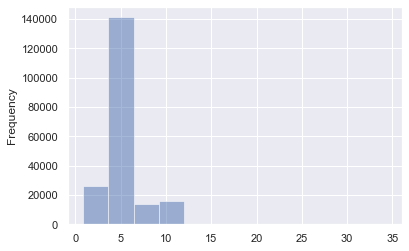

In [39]:
ax = properties_colombia_csv.lat.plot.hist(bins=12, alpha=0.5)

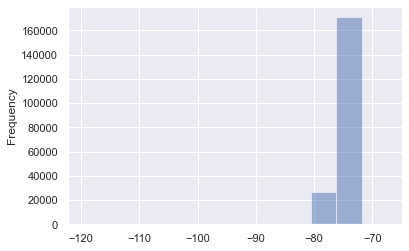

In [40]:
ax = properties_colombia_csv.lon.plot.hist(bins=12, alpha=0.5)

https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/

https://www.kaggle.com/code/sudamyasodya/superstore-sales-prediction-my-copy/notebook

In [72]:
columns_scaler=['lat', 'lon', 'bathrooms', 'created_on_year', 'created_on_month',
'created_on_day', 'end_date_year', 'end_date_month', 'end_date_day',
'start_date_year', 'start_date_month', 'start_date_day']

In [41]:
properties_colombia_train.shape

(197548, 23)

In [83]:
from sklearn.preprocessing import StandardScaler
newdf_5=properties_colombia_train[columns_scaler]
Standar_scaled_features = StandardScaler().fit_transform(newdf_5.values)


In [236]:
print("mean",Standar_scaled_features.mean(axis=0))
print("std",Standar_scaled_features.std(axis=0))


mean [-7.84230594e-16 -1.86480241e-15 -9.54953208e-17  0.00000000e+00
  4.61830478e-16  1.49267639e-16  3.96008844e-17 -1.28550010e-16
  9.98834297e-17  0.00000000e+00  4.61830478e-16  1.49267639e-16]
std [1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.]


In [84]:
df=pd.DataFrame(Standar_scaled_features)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df.columns=columns_scaler

<AxesSubplot:xlabel='lat', ylabel='Density'>

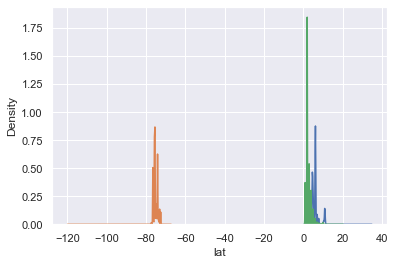

In [127]:
sns.kdeplot(new_df_4["lat"])
sns.kdeplot(new_df_4["lon"])
sns.kdeplot(new_df_4["bathrooms"])


<AxesSubplot:xlabel='lat', ylabel='Density'>

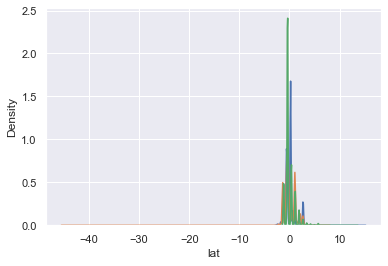

In [129]:
sns.kdeplot(df["lat"])
sns.kdeplot(df["lon"])
sns.kdeplot(df["bathrooms"])

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,197548.0,-7.842306e-16,1.000003,-2.600208,-0.586412,0.190833,0.210164,14.952830
lon,197548.0,-1.864802e-15,1.000003,-45.271882,-0.409508,-0.404581,0.959672,7.820713
bathrooms,197548.0,-9.549532e-17,1.000003,-1.154211,-0.387964,-0.387964,0.378283,13.404485
created_on_year,197548.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
created_on_month,197548.0,4.618305e-16,1.000003,-1.799785,-1.152535,0.141964,0.789213,1.436463
created_on_day,197548.0,1.492676e-16,1.000003,-1.758366,-0.877810,0.112815,0.993370,1.543718
end_date_year,197548.0,3.960088e-17,1.000003,-0.254132,-0.254132,-0.254132,-0.253606,3.936760
end_date_month,197548.0,-1.285500e-16,1.000003,-2.283958,-0.207326,0.385998,0.682659,0.979321
end_date_day,197548.0,9.988343e-17,1.000003,-1.711473,-0.861770,0.094147,0.943850,1.474915
start_date_year,197548.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
df.shape

(197548, 12)

In [85]:
columnas_faltantes=['property_type_Apartamento', 'property_type_Casa','property_type_Finca', 'property_type_Local comercial','property_type_Lote', 'property_type_Oficina', 'property_type_Otro','property_type_Parqueadero', 'currency_COP', 'currency_USD',"price_Binary"]

In [86]:
df_new6=properties_colombia_train[columnas_faltantes].copy()

In [87]:
df[columnas_faltantes]=df_new6[columnas_faltantes].copy()

In [88]:
#remplazo las columnas con el escalado porque al tener diferentes 
# medidas se debe cambiar la escala de las columnas numericas
df

,lat,lon,bathrooms,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,start_date_year,...,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD,price_Binary
0,0.210164,-0.404581,1.144530,0.0,1.436463,-0.327463,3.936760,0.979321,1.474915,0.0,...,1,0,0,0,0,0,0,1,0,1
1,-0.563220,1.119478,-0.387964,0.0,-0.505286,-0.107324,-0.253606,-1.097311,-0.330705,0.0,...,0,0,0,0,0,0,0,1,0,1
2,-0.570403,1.163317,-0.387964,0.0,-1.152535,0.222884,-0.254132,-0.207326,0.306573,0.0,...,1,0,0,0,0,0,0,1,0,1
3,0.210164,-0.404581,-1.154211,0.0,0.789213,0.663162,-0.254132,0.682659,1.368702,0.0,...,0,0,0,0,0,1,0,1,0,1
4,0.210164,-0.404581,-0.387964,0.0,0.141964,-1.208019,-0.254132,0.385998,-1.074195,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197543,-0.601395,1.029150,-0.387964,0.0,0.141964,1.103440,3.936760,0.979321,1.474915,0.0,...,0,0,0,0,0,0,0,1,0,0
197544,-0.591825,1.137897,-1.154211,0.0,0.789213,1.103440,-0.254132,0.979321,-0.861770,0.0,...,0,0,0,0,1,0,0,1,0,0
197545,-1.247522,-1.389856,-1.154211,0.0,0.141964,1.213509,-0.253606,-2.283958,-1.605260,0.0,...,0,0,0,0,0,1,0,1,0,1
197546,-0.588233,1.044274,-0.387964,0.0,-1.152535,-0.327463,-0.254132,-0.207326,-0.330705,0.0,...,1,0,0,0,0,0,0,1,0,0


aca lo guardo en formato csv a el archivo procesado

In [89]:
df.to_csv("columbia_houses_train.csv", index=False)

In [3]:
properties_colombia_train=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\pi-02-dt\columbia_houses_train.csv')

In [91]:
properties_colombia_train.isnull().sum()

lat                              0
lon                              0
bathrooms                        0
created_on_year                  0
created_on_month                 0
created_on_day                   0
end_date_year                    0
end_date_month                   0
end_date_day                     0
start_date_year                  0
start_date_month                 0
start_date_day                   0
property_type_Apartamento        0
property_type_Casa               0
property_type_Finca              0
property_type_Local comercial    0
property_type_Lote               0
property_type_Oficina            0
property_type_Otro               0
property_type_Parqueadero        0
currency_COP                     0
currency_USD                     0
price_Binary                     0
dtype: int64

In [4]:
properties_colombia_test=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\pi-02-dt\columbia_houses_test.csv')

In [5]:
properties_colombia_test.isnull().sum()

lat                              0
lon                              0
bathrooms                        0
created_on_year                  0
created_on_month                 0
created_on_day                   0
end_date_year                    0
end_date_month                   0
end_date_day                     0
start_date_year                  0
start_date_month                 0
start_date_day                   0
property_type_Apartamento        0
property_type_Casa               0
property_type_Finca              0
property_type_Local comercial    0
property_type_Lote               0
property_type_Oficina            0
property_type_Otro               0
property_type_Parqueadero        0
currency_COP                     0
currency_USD                     0
dtype: int64

In [46]:
properties_colombia_test.head(5)

,lat,lon,bathrooms,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,start_date_year,...,property_type_Apartamento,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD
0,0.210164,-0.404581,1.144530,0.0,1.436463,-0.327463,3.936760,0.979321,1.474915,0.0,...,0,1,0,0,0,0,0,0,1,0
1,-0.563220,1.119478,-0.387964,0.0,-0.505286,-0.107324,-0.253606,-1.097311,-0.330705,0.0,...,1,0,0,0,0,0,0,0,1,0
2,-0.570403,1.163317,-0.387964,0.0,-1.152535,0.222884,-0.254132,-0.207326,0.306573,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.210164,-0.404581,-1.154211,0.0,0.789213,0.663162,-0.254132,0.682659,1.368702,0.0,...,0,0,0,0,0,0,1,0,1,0
4,0.210164,-0.404581,-0.387964,0.0,0.141964,-1.208019,-0.254132,0.385998,-1.074195,0.0,...,1,0,0,0,0,0,0,0,1,0


In [47]:
properties_colombia_train.head()

,lat,lon,bathrooms,created_on_year,created_on_month,created_on_day,end_date_year,end_date_month,end_date_day,start_date_year,...,property_type_Apartamento,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_Parqueadero,currency_COP,currency_USD
0,0.210164,-0.404581,1.144530,0.0,1.436463,-0.327463,3.936760,0.979321,1.474915,0.0,...,0,1,0,0,0,0,0,0,1,0
1,-0.563220,1.119478,-0.387964,0.0,-0.505286,-0.107324,-0.253606,-1.097311,-0.330705,0.0,...,1,0,0,0,0,0,0,0,1,0
2,-0.570403,1.163317,-0.387964,0.0,-1.152535,0.222884,-0.254132,-0.207326,0.306573,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.210164,-0.404581,-1.154211,0.0,0.789213,0.663162,-0.254132,0.682659,1.368702,0.0,...,0,0,0,0,0,0,1,0,1,0
4,0.210164,-0.404581,-0.387964,0.0,0.141964,-1.208019,-0.254132,0.385998,-1.074195,0.0,...,1,0,0,0,0,0,0,0,1,0


In [58]:
properties_colombia_train.columns

Index(['lat', 'lon', 'bathrooms', 'created_on_year', 'created_on_month',
       'created_on_day', 'end_date_year', 'end_date_month', 'end_date_day',
       'start_date_year', 'start_date_month', 'start_date_day',
       'property_type_Apartamento', 'property_type_Casa',
       'property_type_Finca', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_Parqueadero', 'currency_COP', 'currency_USD'],
      dtype='object')

In [92]:
#tomo los valores de las columnas
X = properties_colombia_train.iloc[:,:-1]
y =properties_colombia_train.iloc[:,[22]]

In [95]:
#divido los datos en test y entrenamiento
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

utilizo regresion logistica para predecir ya que se usa cuando la variable dependiente es una variable binaria, es decir, de solo dos categorías, también conocidas como dummy o dicotómica.

In [96]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 10) 
classifier.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [97]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(X_test) 
test_acc = precision_score(y_test, y_pred) 
print('La precisión del conjunto de pruebas es {}'.format(test_acc*100))

La precisión del conjunto de pruebas es 70.56525838459122


Text(0.5, 30.5, 'Valores previstos')

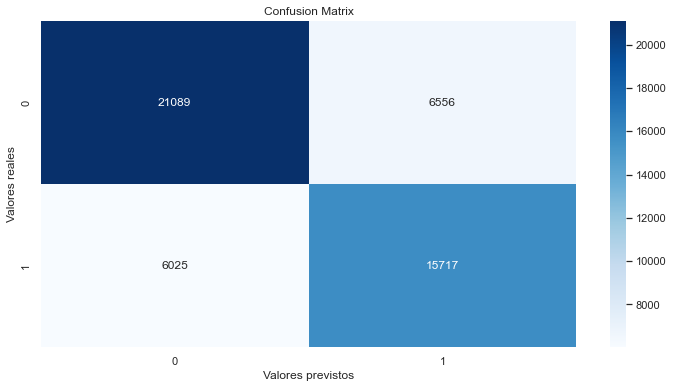

In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
plt.figure(figsize=(12,6)) 
plt.title("Confusion Matrix") 
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues' ) 
plt.ylabel("Valores reales") 
plt.xlabel("Valores previstos")

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     27645
           1       0.71      0.72      0.71     21742

    accuracy                           0.75     49387
   macro avg       0.74      0.74      0.74     49387
weighted avg       0.75      0.75      0.75     49387



In [100]:
X = properties_colombia_test.iloc[:,]

In [102]:
res=classifier.predict(X)

In [105]:
col=["pred"]
df3=pd.DataFrame(res)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df3.columns=col

In [106]:
df3

,pred
0,1
1,0
2,0
3,0
4,0
...,...
197543,0
197544,0
197545,0
197546,0


In [107]:
df3.to_csv("bparedes21.csv", index=False)